# SF-DAT-21 | Lab 05: Storms, `pandas`, and GitHub

## OJECTIVES

This session closes the course's first unit: "Research Design and Data Analysis" in which we covered important building blocks for performing data science work:
- Research Design
- Data Manipulation, dataset tidying and Exploratory Data Analysis with `pandas`
- Statistics and Visualization with `pandas`

Starting with the next session, we will shift our attention to building predictive models.  However, the skills you've learned so far will prove to be very fruitful as a data scientist (e.g., mastering tidying data will save you hours of time and make your data much easier to work on).  This lab gives you an opportunity to put into practice all these concepts.

## BACKGROUND

Severe weather events cause public health and economic problems, many resulting in fatalities, injuries, and property/crop damage.  Preventing such outcomes to the extent possible is a key concern.

Using the U.S. National Oceanic and Atmospheric Administration's (NOAA) storm database (in the `datasets` folder alongside some documentation), which tracked characteristics of major weather events in the United States from 1950 to 2011, you will study and report what types of events cause most of the fatalities, injuries, and economic damages.

## PROMPT

You'll work in group of 4 (no less) to 5 (no more), collaborate using git, GitHub, and the SF-DAT-21-students remote repository here: https://github.com/paspeur/SF-DAT-21-students

Specifically:
- Do individual work inside the directory named after your GitHub username.  This means copying this iPython Notebook (just this notebook `Storm.ipnb`) in your directory.  Commit and push your changes regularly.  (We'll go over it in class)
- Name your team and have one person in your team to create a new directory at the root of the repository in the form `class-05-XXX`.  Copy over there this notebook.
- How exactly you collaborate among yourself (as long as it works) is left for you to decide.  We are there to help you.

## DELIVERABLES

- Your team deliverable (more below) will be the notebook in your team directory; your individual deliverable will be the notebook in your personal directory (it can be the final team notebook but I'm mostly interested in seeing you building proficiency with git/GitHub and this is one way to demonstrate)
- Your notebook should not just be code, not text either.  I'm looking for both text and code, one supporting the other in a logical manner.
- More specifically, I want you to approach your work following the data science workflow.

## DATA SCIENCE WORKFLOW

[Don't read into each question too literally.  The lab is relatively open-ended; the goal is to improve the mastery of your new skills and have fun doing it.]

- **1. IDENTIFY the Problem**
  - Write a SMART research question around the vaguely following objective: "What types of events result in most fatalities, injuries, and economic damages?"


- **2. ACQUIRE the Data**
  - The raw dataset you'll work with is in the `datasets` folder (at the root of the repository) alongside some documentation
  - Questions you might ask yourself:
    - _What type of data is it?  (e.g., cross-sectional or longitudinal)_
    - _How well was the data collected?_
    - _Is there much missing data?_
    - _Was the data collection instrument calibrated?_
    - _Is the dataset aggregated?_
    - _Do we need pre-aggregated data?_


- **3. PARSE the Data**
  - [Again, the documentation is in the `datasets` folder]
  - You need to understand what you're working with
  - To better understand your data
    - _Create or review the data dictionary_
    - _Perform exploratory surface analysis_
    - _Describe data structure and information being collected_
    - _Explore variables and data types_


- **4. Mine the Data**
  - Mine the Data
  - Determine sampling methodology and sample data
  - Format, clean, slice, and combine data in Python
  - Create necessary derived columns from the data (new data)


- **7. Present the Results**
  - Present the Results
  - Summarize findings with narrative, storytelling techniques
  - Present limitations and assumptions of your analysis
  - Identify follow up problems and questions for future analysis

## DOCUMENTATION

- Some documentation for the dataset is in the `datasets` folder at the root of the repository
- `pandas` documentation: http://pandas.pydata.org/pandas-docs/stable/
- Slides from the previous sessions...

## IDEAS TO KEEP IN MIND

1. The datset is big.  You might want to use a small subset to get things working before moving on to the entire dataset.
2. Generate both tables and histograms to answer your questions.  That'll make it into a better presentation to your classmates.
3. At some point in time, you may want to split tidying up the dataset and the exploratory data analysis into different notebooks (multiple well defined notebooks make it easier to collaborate).  You could save your cleaned up dataset into disk (it should be small at this point) and load it from the other notebook.
4. If time allows, create a new tidy dataset reporting fatalities, injuries, and property/crop damage (min, max, median, Q1, Q3, mean, and variance) per calendar year and per state and save it as a CSV file.

## CODE TO GET YOU STARTED

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv(os.path.join('..', 'datasets', 'Storms.csv.bz2'))

/Users/ruijiao.guo/anaconda/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (2,9,10,11,12,16,17,27,28,29,30,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head(2)

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM
0,1,4/18/1950 0:00:00,130,CST,97,...,8812,3051,8806,NaN,1
1,1,4/18/1950 0:00:00,145,CST,3,...,8755,0,0,NaN,2


In [4]:
df.shape

(902297, 37)

In [5]:
df.columns

Index([u'STATE__', u'BGN_DATE', u'BGN_TIME', u'TIME_ZONE', u'COUNTY',
       u'COUNTYNAME', u'STATE', u'EVTYPE', u'BGN_RANGE', u'BGN_AZI',
       u'BGN_LOCATI', u'END_DATE', u'END_TIME', u'COUNTY_END', u'COUNTYENDN',
       u'END_RANGE', u'END_AZI', u'END_LOCATI', u'LENGTH', u'WIDTH', u'F',
       u'MAG', u'FATALITIES', u'INJURIES', u'PROPDMG', u'PROPDMGEXP',
       u'CROPDMG', u'CROPDMGEXP', u'WFO', u'STATEOFFIC', u'ZONENAMES',
       u'LATITUDE', u'LONGITUDE', u'LATITUDE_E', u'LONGITUDE_', u'REMARKS',
       u'REFNUM'],
      dtype='object')

### Set REFNUM as index, so now the we have 37 - 1 = 36 columns left

In [6]:
df.REFNUM[0:5]

0    1
1    2
2    3
3    4
4    5
Name: REFNUM, dtype: float64

In [7]:
df = df.set_index('REFNUM')

In [8]:
df.head(1)

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS
REFNUM,,,,,,,,,,,
1,1,4/18/1950 0:00:00,130,CST,97,...,3040,8812,3051,8806,NaN


### Missing values

In [9]:
df.isnull().sum().tolist()

[0,
 0,
 0,
 0,
 0,
 1589,
 0,
 0,
 0,
 547332,
 287743,
 243411,
 238978,
 0,
 902297,
 0,
 724837,
 499225,
 0,
 0,
 843563,
 0,
 0,
 0,
 0,
 465934,
 0,
 618413,
 142069,
 248769,
 594029,
 47,
 0,
 40,
 0,
 287433]

In [10]:
df.FATALITIES.isnull().sum()

0

### Get column names with missing values

In [11]:
df.isnull().sum() > 0 

STATE__       False
BGN_DATE      False
BGN_TIME      False
TIME_ZONE     False
COUNTY        False
              ...  
LATITUDE       True
LONGITUDE     False
LATITUDE_E     True
LONGITUDE_    False
REMARKS        True
dtype: bool

In [12]:
df.columns[df.isnull().sum() > 0]

Index([u'COUNTYNAME', u'BGN_AZI', u'BGN_LOCATI', u'END_DATE', u'END_TIME',
       u'COUNTYENDN', u'END_AZI', u'END_LOCATI', u'F', u'PROPDMGEXP',
       u'CROPDMGEXP', u'WFO', u'STATEOFFIC', u'ZONENAMES', u'LATITUDE',
       u'LATITUDE_E', u'REMARKS'],
      dtype='object')

In [13]:
## calculate the percentage of missing values of each columns
total = df.shape[0]

for column in df.columns:
    count = df[column].isnull().sum() ## total number of missing values
    # count = total - df[column].count() ## count() will return total number of non-missing values. 
    # count = total - df[column].notnull().sum()
    if count > 0:
        print '{:11s} {:6d} {:3.0f}%'.format(column, count, 100.*(count)/total)

    

COUNTYNAME    1589   0%
BGN_AZI     547332  61%
BGN_LOCATI  287743  32%
END_DATE    243411  27%
END_TIME    238978  26%
COUNTYENDN  902297 100%
END_AZI     724837  80%
END_LOCATI  499225  55%
F           843563  93%
PROPDMGEXP  465934  52%
CROPDMGEXP  618413  69%
WFO         142069  16%
STATEOFFIC  248769  28%
ZONENAMES   594029  66%
LATITUDE        47   0%
LATITUDE_E      40   0%
REMARKS     287433  32%


### Drop missing values

In [14]:
df.dropna() ## nothing left since there are missing values in every row

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS
REFNUM,,,,,,,,,,,


In [15]:
## drop columns with at least one NaN 
df.dropna(axis = 1) ## which is equivalent to df.dropna(how='any',axis=1)

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,INJURIES,PROPDMG,CROPDMG,LONGITUDE,LONGITUDE_
REFNUM,,,,,,,,,,,
1,1,4/18/1950 0:00:00,130,CST,97,...,15,25.0,0,8812,8806
2,1,4/18/1950 0:00:00,145,CST,3,...,0,2.5,0,8755,0
3,1,2/20/1951 0:00:00,1600,CST,57,...,2,25.0,0,8742,0
4,1,6/8/1951 0:00:00,900,CST,89,...,2,2.5,0,8626,0
5,1,11/15/1951 0:00:00,1500,CST,43,...,2,2.5,0,8642,0
...,...,...,...,...,...,...,...,...,...,...,...
902293,56,11/30/2011 0:00:00,10:30:00 PM,MST,7,...,0,0.0,0,0,0
902294,30,11/10/2011 0:00:00,02:48:00 PM,MST,9,...,0,0.0,0,0,0
902295,2,11/8/2011 0:00:00,02:58:00 PM,AKS,213,...,0,0.0,0,0,0


In [16]:
## drop rows with all values as NaN
df.dropna(how='all')

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS
REFNUM,,,,,,,,,,,
1,1,4/18/1950 0:00:00,130,CST,97,...,3040,8812,3051,8806,NaN
2,1,4/18/1950 0:00:00,145,CST,3,...,3042,8755,0,0,NaN
3,1,2/20/1951 0:00:00,1600,CST,57,...,3340,8742,0,0,NaN
4,1,6/8/1951 0:00:00,900,CST,89,...,3458,8626,0,0,NaN
5,1,11/15/1951 0:00:00,1500,CST,43,...,3412,8642,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
902293,56,11/30/2011 0:00:00,10:30:00 PM,MST,7,...,0,0,0,0,EPISODE NARRATIVE: A strong cold front moved s...
902294,30,11/10/2011 0:00:00,02:48:00 PM,MST,9,...,0,0,0,0,EPISODE NARRATIVE: A strong westerly flow alof...
902295,2,11/8/2011 0:00:00,02:58:00 PM,AKS,213,...,0,0,0,0,EPISODE NARRATIVE: A 960 mb low over the south...


In [17]:
## drop columns with all values as NaN
df.dropna(how='all',axis=1)

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS
REFNUM,,,,,,,,,,,
1,1,4/18/1950 0:00:00,130,CST,97,...,3040,8812,3051,8806,NaN
2,1,4/18/1950 0:00:00,145,CST,3,...,3042,8755,0,0,NaN
3,1,2/20/1951 0:00:00,1600,CST,57,...,3340,8742,0,0,NaN
4,1,6/8/1951 0:00:00,900,CST,89,...,3458,8626,0,0,NaN
5,1,11/15/1951 0:00:00,1500,CST,43,...,3412,8642,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
902293,56,11/30/2011 0:00:00,10:30:00 PM,MST,7,...,0,0,0,0,EPISODE NARRATIVE: A strong cold front moved s...
902294,30,11/10/2011 0:00:00,02:48:00 PM,MST,9,...,0,0,0,0,EPISODE NARRATIVE: A strong westerly flow alof...
902295,2,11/8/2011 0:00:00,02:58:00 PM,AKS,213,...,0,0,0,0,EPISODE NARRATIVE: A 960 mb low over the south...


In [18]:
## one can also use threshold.
#df.dropna(thresh=)

## Duplicates

In [19]:
df.duplicated() ## check row duplicates, too many rows, cannot be seen, check sum()

REFNUM
1         False
2         False
3         False
4         False
5         False
          ...  
902293    False
902294    False
902295    False
902296    False
902297    False
dtype: bool

In [20]:
df.duplicated().sum() ## 3134 duplicated rows

3143

In [21]:
df[df.duplicated()]

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS
REFNUM,,,,,,,,,,,
19,1,5/10/1952 0:00:00,900,CST,57,...,3344,8745,0,0,NaN
20,1,5/10/1952 0:00:00,900,CST,57,...,3344,8745,0,0,NaN
260,1,7/4/1960 0:00:00,1750,CST,13,...,3139,8636,0,0,NaN
603,1,5/14/1967 0:00:00,2330,CST,77,...,3453,8730,0,0,NaN
604,1,5/14/1967 0:00:00,2330,CST,77,...,3453,8730,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
900771,38,10/7/2011 0:00:00,03:00:00 PM,CST,7,...,0,0,0,0,EPISODE NARRATIVE: A strong early October low ...
900806,27,10/7/2011 0:00:00,04:00:00 PM,CST,1,...,0,0,0,0,EPISODE NARRATIVE: A strong early October low ...
900807,36,10/29/2011 0:00:00,01:00:00 PM,EST,57,...,0,0,0,0,EPISODE NARRATIVE: An early season winter stor...


In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.duplicated().sum()

0

In [24]:
df.shape

(899154, 36)

### Rename columns FATALITIES and INJURIES

In [25]:
df.rename(columns={'FATALITIES': 'Fatalities', 'INJURIES': 'Injuries'
                  }, inplace=True)

In [26]:
df.columns

Index([u'STATE__', u'BGN_DATE', u'BGN_TIME', u'TIME_ZONE', u'COUNTY',
       u'COUNTYNAME', u'STATE', u'EVTYPE', u'BGN_RANGE', u'BGN_AZI',
       u'BGN_LOCATI', u'END_DATE', u'END_TIME', u'COUNTY_END', u'COUNTYENDN',
       u'END_RANGE', u'END_AZI', u'END_LOCATI', u'LENGTH', u'WIDTH', u'F',
       u'MAG', u'Fatalities', u'Injuries', u'PROPDMG', u'PROPDMGEXP',
       u'CROPDMG', u'CROPDMGEXP', u'WFO', u'STATEOFFIC', u'ZONENAMES',
       u'LATITUDE', u'LONGITUDE', u'LATITUDE_E', u'LONGITUDE_', u'REMARKS'],
      dtype='object')

### Property and Crop Damage:
* the unit for these two columns are different and now we need to make it consistent. 

In [27]:
print len(df.PROPDMGEXP.value_counts().index.tolist())
df.PROPDMGEXP.value_counts().index.tolist()

18


['K',
 'M',
 '0',
 'B',
 '5',
 '1',
 '2',
 '?',
 'm',
 'H',
 '+',
 '7',
 '4',
 '3',
 '6',
 '-',
 '8',
 'h']

In [28]:
print len(df.CROPDMGEXP.value_counts().index.tolist())
df.CROPDMGEXP.value_counts().index.tolist()

8


['K', 'M', 'k', '0', 'B', '?', 'm', '2']

In [29]:
## combine two list and get the unique
unit_list = df.PROPDMGEXP.value_counts().index.tolist() + df.CROPDMGEXP.value_counts().index.tolist()
print len(unit_list)
unit_list = list(set(unit_list))
print len(unit_list)
unit_list = sorted(unit_list)
unit_list

26
19


['+',
 '-',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '?',
 'B',
 'H',
 'K',
 'M',
 'h',
 'k',
 'm']

In [30]:
exponent_to_multiplier = {
 np.nan: np.nan,
 '+': np.nan,
 '-': np.nan,
 '?': np.nan,
 '0': 10 ** 0,
 '1': 10 ** 1,
 '2': 10 ** 2,
 '3': 10 ** 3,
 '4': 10 ** 4,
 '5': 10 ** 5,
 '6': 10 ** 6,
 '7': 10 ** 7,
 '8': 10 ** 8,
 'h': 10 ** 2,
 'H': 10 ** 2,
 'k': 10 ** 3,
 'K': 10 ** 3,
 'm': 10 ** 6,
 'M': 10 ** 6,
 'B': 10 ** 9,
}

In [31]:
df['PropertyDamage'] = df.PROPDMG * df.PROPDMGEXP.map(exponent_to_multiplier)
df['PropertyDamage']

REFNUM
1         25000
2          2500
3         25000
4          2500
5          2500
          ...  
902293        0
902294        0
902295        0
902296        0
902297        0
Name: PropertyDamage, dtype: float64

In [32]:
df['CropDamage'] = df.CROPDMG * df.CROPDMGEXP.map(exponent_to_multiplier)
df['CropDamage']

REFNUM
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
          ..
902293     0
902294     0
902295     0
902296     0
902297     0
Name: CropDamage, dtype: float64

In [33]:
### drop unwanted columns
df.drop(['CROPDMG','CROPDMGEXP','PROPDMG','PROPDMGEXP'], axis=1, inplace=True)

In [34]:
df.shape

(899154, 34)

In [35]:
fatalities = df.Fatalities.sum()
injuries = df.Injuries.sum()
property_damage = df.PropertyDamage.sum()
crop_damage = df.CropDamage.sum()

In [36]:
print fatalities
print injuries
print property_damage/10**6
print crop_damage/10**6

15081.0
139710.0
426636.961988
49028.86267


In [37]:
## operator chaining - drop rows if all values in these four columns are less or equal to zero
df = df[(df['Fatalities'] > 0) | (df['Injuries'] > 0) | (df['PropertyDamage']) >0 | (df['CropDamage'] > 0)]
print df.shape
df.head(2)

(231752, 34)


,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LATITUDE_E,LONGITUDE_,REMARKS,PropertyDamage,CropDamage
REFNUM,,,,,,,,,,,
1,1,4/18/1950 0:00:00,130,CST,97,...,3051,8806,NaN,25000,NaN
2,1,4/18/1950 0:00:00,145,CST,3,...,0,0,NaN,2500,NaN


### Event Type

In [38]:
df.columns

Index([u'STATE__', u'BGN_DATE', u'BGN_TIME', u'TIME_ZONE', u'COUNTY',
       u'COUNTYNAME', u'STATE', u'EVTYPE', u'BGN_RANGE', u'BGN_AZI',
       u'BGN_LOCATI', u'END_DATE', u'END_TIME', u'COUNTY_END', u'COUNTYENDN',
       u'END_RANGE', u'END_AZI', u'END_LOCATI', u'LENGTH', u'WIDTH', u'F',
       u'MAG', u'Fatalities', u'Injuries', u'WFO', u'STATEOFFIC', u'ZONENAMES',
       u'LATITUDE', u'LONGITUDE', u'LATITUDE_E', u'LONGITUDE_', u'REMARKS',
       u'PropertyDamage', u'CropDamage'],
      dtype='object')

In [39]:
np.sort(df.EVTYPE.unique()) ## upper case and lower case are treated different in unique() method. so we transform all 
## the type to upper case. 

array(['   HIGH SURF ADVISORY', ' FLASH FLOOD', ' TSTM WIND',
       ' TSTM WIND (G45)', '?', 'APACHE COUNTY', 'ASTRONOMICAL HIGH TIDE',
       'ASTRONOMICAL LOW TIDE', 'AVALANCE', 'AVALANCHE', 'BLACK ICE',
       'BLIZZARD', 'BLIZZARD/WINTER STORM', 'BLOWING DUST', 'BLOWING SNOW',
       'BRUSH FIRE', 'Beach Erosion', 'COASTAL  FLOODING/EROSION',
       'COASTAL EROSION', 'COASTAL FLOOD', 'COASTAL FLOODING',
       'COASTAL FLOODING/EROSION', 'COASTAL STORM', 'COASTAL SURGE',
       'COASTALSTORM', 'COLD', 'COLD AND SNOW', 'COLD WAVE',
       'COLD WEATHER', 'COLD/WIND CHILL', 'COLD/WINDS', 'Coastal Flood',
       'Coastal Flooding', 'Coastal Storm', 'Cold', 'Cold Temperature',
       'DAM BREAK', 'DAMAGING FREEZE', 'DENSE FOG', 'DENSE SMOKE',
       'DOWNBURST', 'DROUGHT', 'DROUGHT/EXCESSIVE HEAT', 'DROWNING',
       'DRY MICROBURST', 'DRY MIRCOBURST WINDS', 'DUST DEVIL',
       'DUST DEVIL WATERSPOUT', 'DUST STORM', 'Dust Devil',
       'EXCESSIVE HEAT', 'EXCESSIVE RAINFALL', 'EXCES

In [42]:
len(np.sort(df.EVTYPE.unique()))

438

In [41]:
df.EVTYPE.map(lambda type: type.strip().upper()).unique()

array(['TORNADO', 'TSTM WIND', 'HAIL', 'ICE STORM/FLASH FLOOD',
       'WINTER STORM', 'THUNDERSTORM WINDS', 'HEAVY RAIN', 'LIGHTNING',
       'THUNDERSTORM WIND', 'DENSE FOG', 'RIP CURRENT',
       'THUNDERSTORM WINS', 'FLASH FLOODING', 'FLASH FLOOD', 'TORNADO F0',
       'THUNDERSTORM WINDS LIGHTNING', 'HEAT', 'HIGH WINDS', 'WIND',
       'HEAVY RAINS', 'LIGHTNING AND HEAVY RAIN',
       'THUNDERSTORM WINDS HAIL', 'COLD', 'HEAVY RAIN/LIGHTNING',
       'THUNDERSTORM WINDS/HAIL', 'FLASH FLOODING/THUNDERSTORM WI',
       'WATERSPOUT', 'EXTREME COLD', 'LIGHTNING/HEAVY RAIN', 'HIGH WIND',
       'FREEZE', 'RIVER FLOOD', 'AVALANCHE', 'MARINE MISHAP', 'HIGH TIDES',
       'HIGH WIND/SEAS', 'HIGH WINDS/HEAVY RAIN', 'HIGH SEAS',
       'COASTAL FLOOD', 'SEVERE TURBULENCE', 'RECORD RAINFALL',
       'HEAVY SNOW', 'HEAVY SNOW/WIND', 'DUST STORM', 'FLOOD',
       'APACHE COUNTY', 'SLEET', 'DUST DEVIL', 'ICE STORM',
       'EXCESSIVE HEAT', 'THUNDERSTORM WINDS/FUNNEL CLOU', 'GUSTY WINDS',
      

In [45]:
len(df.EVTYPE.map(lambda type: type.strip().upper()).unique())

397

In [46]:
np.sort(df.EVTYPE.map(lambda type: type.strip().upper()).unique())

array(['?', 'APACHE COUNTY', 'ASTRONOMICAL HIGH TIDE',
       'ASTRONOMICAL LOW TIDE', 'AVALANCE', 'AVALANCHE', 'BEACH EROSION',
       'BLACK ICE', 'BLIZZARD', 'BLIZZARD/WINTER STORM', 'BLOWING DUST',
       'BLOWING SNOW', 'BRUSH FIRE', 'COASTAL  FLOODING/EROSION',
       'COASTAL EROSION', 'COASTAL FLOOD', 'COASTAL FLOODING',
       'COASTAL FLOODING/EROSION', 'COASTAL STORM', 'COASTAL SURGE',
       'COASTALSTORM', 'COLD', 'COLD AND SNOW', 'COLD TEMPERATURE',
       'COLD WAVE', 'COLD WEATHER', 'COLD/WIND CHILL', 'COLD/WINDS',
       'DAM BREAK', 'DAMAGING FREEZE', 'DENSE FOG', 'DENSE SMOKE',
       'DOWNBURST', 'DROUGHT', 'DROUGHT/EXCESSIVE HEAT', 'DROWNING',
       'DRY MICROBURST', 'DRY MIRCOBURST WINDS', 'DUST DEVIL',
       'DUST DEVIL WATERSPOUT', 'DUST STORM', 'EROSION/CSTL FLOOD',
       'EXCESSIVE HEAT', 'EXCESSIVE RAINFALL', 'EXCESSIVE SNOW',
       'EXTENDED COLD', 'EXTREME COLD', 'EXTREME COLD/WIND CHILL',
       'EXTREME HEAT', 'EXTREME WIND CHILL', 'EXTREME WINDCHILL'

### Official Event Type

In [47]:
official_event_types = [
    'Astronomical Low Tide', 'Avalanche',
    'Blizzard', 'Coastal Flood', 'Cold/Wind Chill', 'Debris Flow',
    'Dense Fog', 'Dense Smoke', 'Drought', 'Dust Devil', 'Dust Storm',
    'Excessive Heat', 'Extreme Cold/Wind Chill', 'Flash Flood', 'Flood',
    'Frost/Freeze', 'Funnel Cloud', 'Freezing Fog', 'Hail', 'Heat',
    'Heavy Rain', 'Heavy Snow', 'High Surf', 'High Wind',
    'Hurricane (Typhoon)', 'Ice Storm', 'Lake-Effect Snow',
    'Lakeshore Flood', 'Lightning', 'Marine Hail', 'Marine High Wind',
    'Marine Strong Wind', 'Marine Thunderstorm Wind', 'Rip Current',
    'Seiche', 'Sleet', 'Storm Surge/Tide', 'Strong Wind',
    'Thunderstorm Wind', 'Tornado', 'Tropical Depression',
    'Tropical Storm', 'Tsunami', 'Volcanic Ash', 'Waterspout', 'Wildfire',
    'Winter Storm', 'Winter Weather',

    # We are also adding 'OTHER'...
    'OTHER'
]

official_event_types = map(lambda type: type.strip().upper(), official_event_types) 

In [48]:
official_event_types

['ASTRONOMICAL LOW TIDE',
 'AVALANCHE',
 'BLIZZARD',
 'COASTAL FLOOD',
 'COLD/WIND CHILL',
 'DEBRIS FLOW',
 'DENSE FOG',
 'DENSE SMOKE',
 'DROUGHT',
 'DUST DEVIL',
 'DUST STORM',
 'EXCESSIVE HEAT',
 'EXTREME COLD/WIND CHILL',
 'FLASH FLOOD',
 'FLOOD',
 'FROST/FREEZE',
 'FUNNEL CLOUD',
 'FREEZING FOG',
 'HAIL',
 'HEAT',
 'HEAVY RAIN',
 'HEAVY SNOW',
 'HIGH SURF',
 'HIGH WIND',
 'HURRICANE (TYPHOON)',
 'ICE STORM',
 'LAKE-EFFECT SNOW',
 'LAKESHORE FLOOD',
 'LIGHTNING',
 'MARINE HAIL',
 'MARINE HIGH WIND',
 'MARINE STRONG WIND',
 'MARINE THUNDERSTORM WIND',
 'RIP CURRENT',
 'SEICHE',
 'SLEET',
 'STORM SURGE/TIDE',
 'STRONG WIND',
 'THUNDERSTORM WIND',
 'TORNADO',
 'TROPICAL DEPRESSION',
 'TROPICAL STORM',
 'TSUNAMI',
 'VOLCANIC ASH',
 'WATERSPOUT',
 'WILDFIRE',
 'WINTER STORM',
 'WINTER WEATHER',
 'OTHER']

In [51]:
subset_df = df[df.EVTYPE.isin(official_event_types)]

In [54]:
subset_df.shape

(155293, 34)

In [69]:
def debug(subset_df):
    print 'Using official event types: {:.2f}'.format(1. * len(subset_df)/len(df))
    print ' -Fatalities: {:.2f}'.format(subset_df.Fatalities.sum()/fatalities)
    print ' -Injuries: {:.2f}'.format(subset_df.Injuries.sum()/injuries)
    print ' -Property Damages: {:.2f}'.format(subset_df.PropertyDamage.sum()/property_damage)
    print ' -Crop Damages: {:.2f}'.format(subset_df.CropDamage.sum()/crop_damage)

In [70]:
debug(subset_df)

Using official event types: 0.67
 -Fatalities: 0.82
 -Injuries: 0.81
 -Property Damages: 0.33
 -Crop Damages: 0.00


### Unofficial event types

In [72]:
todo_df = df[~(df.index.isin(subset_df.index)) & (df.Fatalities > 0)]

In [73]:
todo_df.shape

(1207, 34)

In [77]:
todo_df[['EVTYPE','Fatalities']].groupby('EVTYPE').sum().sort_values(by = ['Fatalities'],ascending=[0])

,Fatalities
EVTYPE,
TSTM WIND,500
RIP CURRENTS,204
HEAT WAVE,168
EXTREME COLD,159
EXTREME HEAT,96
...,...
Marine Accident,1
Mudslides,1
RAIN/WIND,1


In [79]:
unrecognized_event_types_to_recognized_event_types = {
    'COLD': 'COLD/WIND CHILL', 'COLD AND SNOW': 'COLD/WIND CHILL',
    'COLD WEATHER': 'COLD/WIND CHILL',
    'EXTREME COLD': 'EXTREME COLD/WIND CHILL',
    'EXTREME HEAT': 'EXCESSIVE HEAT',
    'EXTREME WINDCHILL': 'EXTREME COLD/WIND CHILL',
    'FLASH FLOOD/FLOOD': 'FLASH FLOOD',
    'FLASH FLOODING': 'FLASH FLOOD',
    'FLASH FLOODING/FLOOD': 'FLASH FLOOD',
    'FLOOD/FLASH FLOOD': 'FLASH FLOOD',
    'FLOODING': 'FLOOD',
    'FOG': 'DENSE FOG',
    'FREEZE': 'FROST/FREEZE',
    'FREEZING RAIN': 'HEAVY RAIN',
    'GLAZE': 'OTHER',
    'HEAT WAVE': 'HEAT',
    'HEAT WAVES': 'HEAT',
    'HEAVY RAIN/SEVERE WEATHER': 'HEAVY RAIN',
    'HEAVY SURF': 'HIGH SURF',
    'HEAVY SURF/HIGH SURF': 'HIGH SURF',
    'HIGH SEAS': 'OTHER',
    'HIGH WINDS': 'HIGH WIND',
    'HURRICANE': 'HURRICANE (TYPHOON)',
    'HURRICANE ERIN': 'HURRICANE (TYPHOON)',
    'HURRICANE OPAL': 'HURRICANE (TYPHOON)',
    'HURRICANE/TYPHOON': 'HURRICANE (TYPHOON)',
    'HYPOTHERMIA/EXPOSURE': 'OTHER',
    'ICE': 'ICE STORM',
    'ICY ROADS': 'OTHER',
    'LANDSLIDE': 'OTHER',
    'LOW TEMPERATURE': 'COLD/WIND CHILL',
    'MARINE MISHAP': 'MARINE HAIL',
    'MARINE TSTM WIND': 'MARINE THUNDERSTORM WIND RIP CURRENT',
    'RECORD/EXCESSIVE HEAT': 'EXCESSIVE HEAT',
    'RIP CURRENTS': 'MARINE THUNDERSTORM WIND RIP CURRENT',
    'RIVER FLOOD': 'FLOOD',
    'ROUGH SEAS': 'MARINE STRONG WIND',
    'SEVERE THUNDERSTORM': 'THUNDERSTORM WIND',
    'STORM SURGE': 'STORM SURGE/TIDE',
    'STRONG WINDS': 'STRONG WIND',
    'THUNDERSTORM WINDS': 'THUNDERSTORM WIND',
    'TORNADOES, TSTM WIND, HAIL': 'TORNADO',
    'TROPICAL STORM GORDON': 'TROPICAL STORM',
    'TSTM WIND': 'THUNDERSTORM WIND',
    'TSTM WIND/HAIL': 'THUNDERSTORM WIND',
    'TYPHOON': 'HURRICANE (TYPHOON)',
    'UNSEASONABLY WARM': 'OTHER',
    'UNSEASONABLY WARM AND DRY': 'OTHER',
    'URBAN/SML STREAM FLD': 'FLOOD',
    'WILD FIRES': 'WILDFIRE',
    'WILD/FOREST FIRE': 'WILDFIRE',
    'WIND': 'HIGH WIND',
    'WINTER STORMS': 'WINTER STORM',
    'WINTER WEATHER/MIX': 'WINTER WEATHER'
}

In [85]:
def event_type(event_type):
    if event_type in official_event_types:
        return event_type

    if event_type in unrecognized_event_types_to_recognized_event_types:
        return unrecognized_event_types_to_recognized_event_types[event_type]
    return event_type

In [86]:
df['EVTYPE'] = df.EVTYPE.map(event_type)

In [87]:
debug(df[df.EVTYPE.isin(official_event_types)])

Using official event types: 0.99
 -Fatalities: 0.92
 -Injuries: 0.89
 -Property Damages: 0.58
 -Crop Damages: 0.00


In [88]:
df = df[df.EVTYPE.isin(official_event_types)]

In [89]:
df.shape

(230076, 34)

### Fatalities

In [90]:
sum_df = df[['EVTYPE','Fatalities','Injuries','PropertyDamage','CropDamage']].groupby(['EVTYPE']).sum()

In [91]:
sum_df

,Fatalities,Injuries,PropertyDamage,CropDamage
EVTYPE,,,,
ASTRONOMICAL LOW TIDE,0,0,320000,0
AVALANCHE,224,170,3721800,0
BLIZZARD,86,400,602013950,0
COASTAL FLOOD,3,2,237665560,0
COLD/WIND CHILL,156,60,2490000,0
...,...,...,...,...
VOLCANIC ASH,0,0,500000,NaN
WATERSPOUT,3,29,9353700,0
WILDFIRE,58,1427,6917019500,0


In [93]:
sum_df.PropertyDamage = sum_df.PropertyDamage/10**9
sum_df.CropDamage = sum_df.CropDamage/10**9

In [100]:
fatalities_df = sum_df.Fatalities.sort_values(ascending=False)
fatalities_df

EVTYPE
TORNADO                  5404
EXCESSIVE HEAT           1970
HEAT                     1071
FLASH FLOOD               929
LIGHTNING                 816
                         ... 
SEICHE                      0
FREEZING FOG                0
FROST/FREEZE                0
FUNNEL CLOUD                0
ASTRONOMICAL LOW TIDE       0
Name: Fatalities, dtype: float64

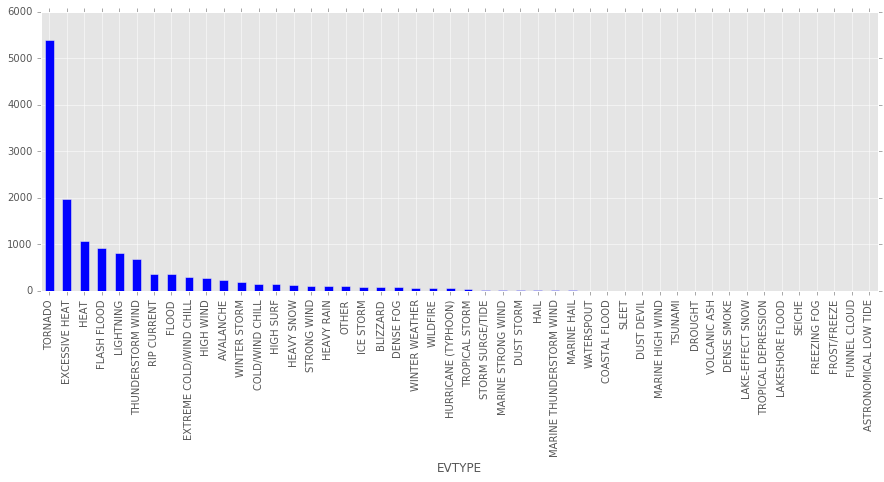

In [107]:
fig = plt.figure(figsize=(15,5))
fatalities_df.plot(kind='bar')

In [102]:
injuries_df = sum_df.Injuries.sort_values(ascending=False)
injuries_df

EVTYPE
TORNADO                  88304
THUNDERSTORM WIND         9077
EXCESSIVE HEAT            6662
LIGHTNING                 5218
HEAT                      1556
                         ...  
SLEET                        0
SEICHE                       0
LAKE-EFFECT SNOW             0
LAKESHORE FLOOD              0
ASTRONOMICAL LOW TIDE        0
Name: Injuries, dtype: float64

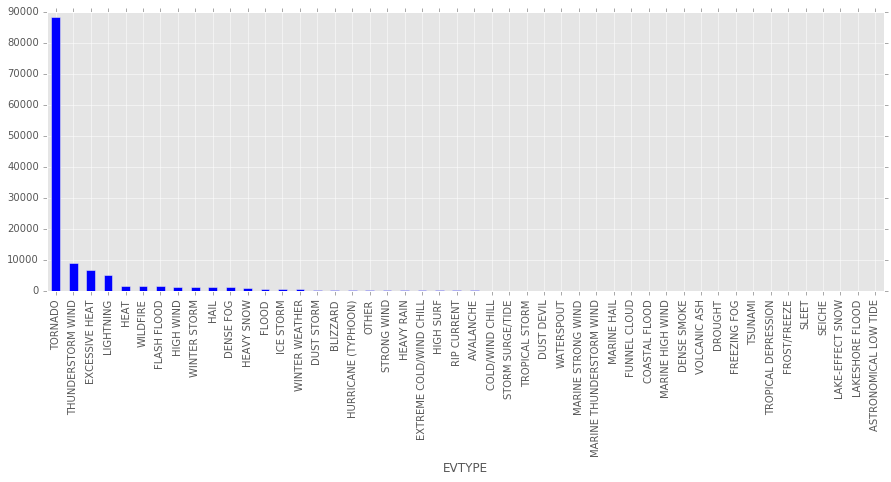

In [109]:
fig = plt.figure(figsize=(15,5))
injuries_df.plot(kind='bar')

In [103]:
propertydamage_df = sum_df.PropertyDamage.sort_values(ascending=False)
propertydamage_df

EVTYPE
TORNADO                5.454690e-08
HURRICANE (TYPHOON)    4.821603e-08
STORM SURGE/TIDE       4.796159e-08
FLOOD                  2.187324e-08
FLASH FLOOD            1.421063e-08
                           ...     
FUNNEL CLOUD           1.746000e-13
DENSE SMOKE            1.000000e-13
MARINE HAIL            4.000000e-15
RIP CURRENT            1.000000e-15
SLEET                           NaN
Name: PropertyDamage, dtype: float64

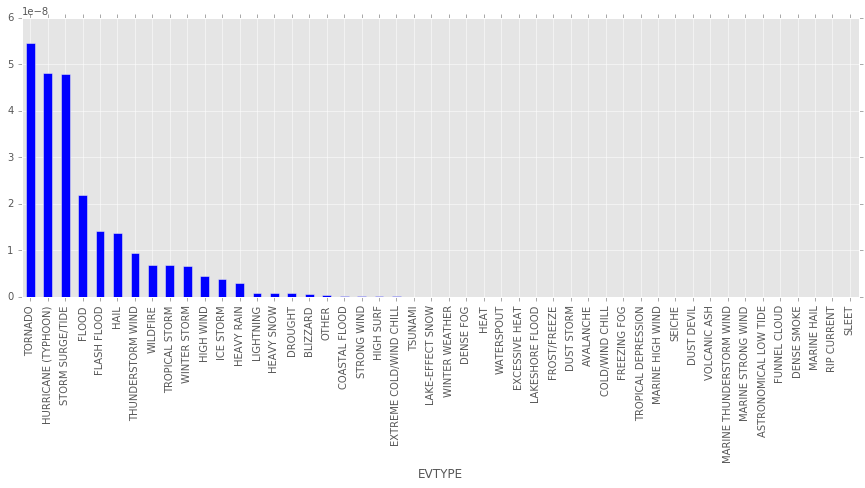

In [110]:
fig = plt.figure(figsize=(15,5))
propertydamage_df.plot(kind='bar')

In [105]:
cropdamage_df = sum_df.CropDamage.sort_values(ascending=False)
cropdamage_df

EVTYPE
WINTER WEATHER              0
EXTREME COLD/WIND CHILL     0
HEAVY SNOW                  0
HEAVY RAIN                  0
HEAT                        0
                           ..
LAKESHORE FLOOD             0
LAKE-EFFECT SNOW            0
ASTRONOMICAL LOW TIDE       0
SLEET                     NaN
VOLCANIC ASH              NaN
Name: CropDamage, dtype: float64

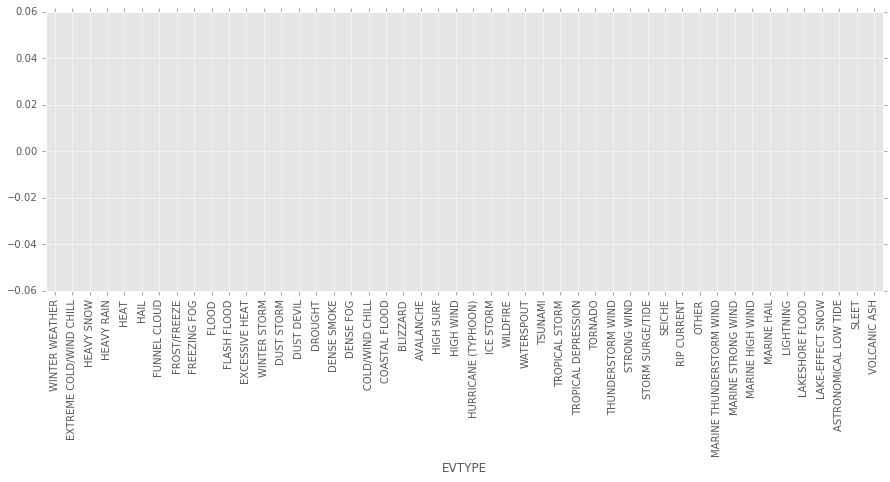

In [111]:
fig = plt.figure(figsize=(15,5))
cropdamage_df.plot(kind='bar')